# Import libraries

In [1]:
from __future__ import division, print_function

import os
import numpy as np
import matplotlib.pyplot as plt
import math
from math import pi

from IPython.display import clear_output

from library import * # All library modules
import data_manager as dm
%matplotlib inline

# Directories

In [2]:
dir_main = os.getcwd() # Main directory
dir_opts = os.path.join(dir_main, 'options') # Contains all plot options

# Data set directories for import/export
dataset_name = 'dataset_fig6_nogain'
dataset_name2 = 'dataset_fig6_gain'

dir_data = os.path.join(dir_main, 'data', dataset_name)
dir_data2 = os.path.join(dir_main, 'data', dataset_name2)

# Generate multiple-iteration plots

The following plots use **vary gain** or **vary injury index** data sets generated from `comp_script`. Set `dataset_name` to be the name of your data folder containing all solution folders, or `dir_data` to be the name of your data directory.

## Import data

In [3]:
# Processor
pro = dm.Processor()
pro2 = dm.Processor()

# Directories
pro.dir_save = dir_data
pro2.dir_save = dir_data2

# Save data set from first directory
print('Processing data...')
pro.save_dataset()
clear_output()
print('Data processing complete')

load_pro2 = True

# Figure size
full_size = (8.27, 11.69)

# Plot options
po = plot_pack.plot_options

line_opts = po('line', 'default')
line_opts2 = po('line', 'small')
line_opts3 = po('line', 'dotted')
mark_opts = po('marker', 'default_bullet')

Data processing complete


## Data Type

Run one of the following depending on the type of data plotted.

### 1. Plot solutions over varying gains

In [ ]:
# Select folders to show
folders = [0, 3, 5]
colours = ['black', 'orange', 'red']

### 2. Plot plasticity vs. non-plasticity over varying injury

In [4]:
# Select folders to show
folders = [8]
colours = ['black']
colours2 = ['red']

# Load 2nd data set
print('Processing data...')
pro2.save_dataset()
clear_output()
print('Data processing complete')

load_pro2 = True

Data processing complete


## Net delays

Plots a random sample of the centralized phases from the numerical solution

In [ ]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Set plot options
plot_pack.basic_template(ax, tick='medium')

# Plot arrays
for i in range(len(folders)):
    key = folders[i]
    colour = colours[i]
    
    x_array = pro.data[key].t
    y_array = pro.data[key].net_tau
    
    ax.plot(x_array, y_array, color=colour, **line_opts)

if load_pro2:
    for j in range(len(folders)):
        key2 = folders[j]
        colour2 = colours[j]
        
        x_array2 = pro2.data[key2].t
        y_array2 = pro2.data[key2].net_tau
    
        ax.plot(x_array2, y_array2, color=colour2, **line_opts)
    
# Plot horizontal line
ax.axhline(y=0, color='black', **line_opts3)

## Mean frequency over time

Plots the mean frequency of selected solutions over time.

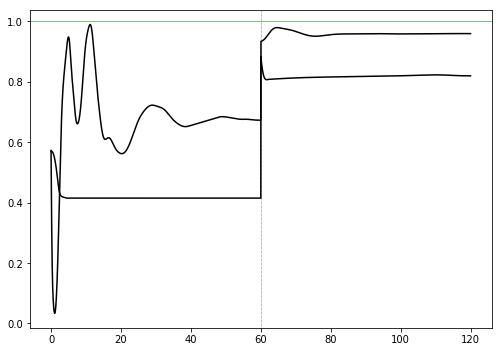

In [10]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Set plot options
plot_pack.basic_template(ax, tick='medium')

# Plot arrays
for i in range(len(folders)):
    key = folders[i]
    colour = colours[i]
    
    x_array = pro.data[key].t
    y_array = pro.data[key].meanYP
    
    ax.plot(x_array, y_array, color=colour, **line_opts)
    
if load_pro2:
    for j in range(len(folders)):
        key2 = folders[j]
        colour2 = colours[j]

        x_array2 = pro2.data[key2].t
        y_array2 = pro2.data[key2].meanYP

        ax.plot(x_array2, y_array2, color=colour2, **line_opts)
        
        # Plot vertical line
        ax.axvline(x=pro.inj_time, color='black', **line_opts3)

# Plot horizontal line
ax.axhline(y=pro.omega0, color='green', **line_opts2) 

## Asymptotic frequency

Plots asymptotic frequency vs. gain or the injury index. If against injury index, compares
the trend with plasticity and without plasticity.

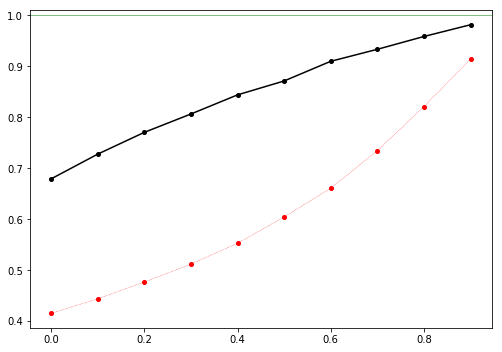

In [6]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Set plot options
plot_pack.basic_template(ax, tick='medium')

# Compile asymptotic arrays
asy = 0.1
pro.compile_asy_arrays(asy=asy)

# Plot arrays
if not load_pro2:
    x_array = pro.gain_array
else:
    x_array = pro.inj_array
    
y_array = pro.asy_Omega
y_err = pro.asy_Omega_range
y_err[0] = y_array - y_err[0]
y_err[1] = y_err[1] - y_array

ax.errorbar(x_array, y_array, yerr=y_err, color=colours[0], **mark_opts)
ax.plot(x_array, y_array, color=colours[0], **line_opts)

if load_pro2:
    pro2.compile_asy_arrays(asy=asy)
    
    x_array2 = pro2.inj_array
    y_array2 = pro2.asy_Omega
    y_err2 = pro2.asy_Omega_range
    y_err2[0] = y_array2 - y_err2[0]
    y_err2[1] = y_err2[1] - y_array2

    ax.errorbar(x_array2, y_array2, yerr=y_err2, color=colours2[0], **mark_opts)
    ax.plot(x_array2, y_array2, color=colours2[0], **line_opts3)
    
    # Plot vertical line
    # ax.axvline(x=pro.inj_time, color='black', **line_opts3)
    
# Plot horizontal line
ax.axhline(y=pro.omega0, color='green', **line_opts2)

## Delta over time

Plots the delta (phase difference) of selected solutions over time.

In [ ]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Set plot options
plot_pack.basic_template(ax, tick='medium')

# Plot arrays
for i in range(len(folders)):
    key = folders[i]
    colour = colours[i]
    
    x_array = pro.data[key].t
    y_array = pro.data[key].delta
    
    ax.plot(x_array, y_array, color=colour, **line_opts)
    
if load_pro2:
    for j in range(len(folders)):
        key2 = folders[j]
        colour2 = colours[j]

        x_array2 = pro2.data[key2].t
        y_array2 = pro2.data[key2].delta

        ax.plot(x_array2, y_array2, color=colour2, **line_opts)
        
        # Plot vertical line
        ax.axvline(x=pro.inj_time, color='black', **line_opts3)

# Plot horizontal line
ax.axhline(y=0, color='black', **line_opts2) 

## Asymptotic delta

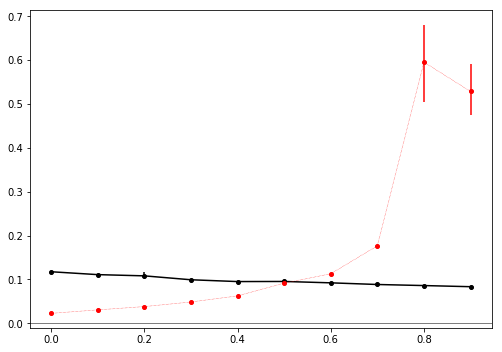

In [9]:
# Generate plot
prop = (1.0, 0.5)
fig_size = (prop[0]*full_size[0], prop[1]*full_size[1])
fig, ax = plt.subplots(figsize=fig_size)

# Set plot options
plot_pack.basic_template(ax, tick='medium')

# Compile asymptotic arrays
asy = 0.1
pro.compile_asy_arrays(asy=asy)

# Plot arrays
if not load_pro2:
    x_array = pro.gain_array
else:
    x_array = pro.inj_array
    
y_array = pro.asy_delta
y_err = pro.asy_delta_range
y_err[0] = y_array - y_err[0]
y_err[1] = y_err[1] - y_array

ax.errorbar(x_array, y_array, yerr=y_err, color=colours[0], **mark_opts)
ax.plot(x_array, y_array, color=colours[0], **line_opts)

if load_pro2:
    pro2.compile_asy_arrays(asy=asy)
    
    x_array2 = pro2.inj_array
    y_array2 = pro2.asy_delta
    y_err2 = pro2.asy_delta_range
    y_err2[0] = y_array2 - y_err2[0]
    y_err2[1] = y_err2[1] - y_array2

    ax.errorbar(x_array2, y_array2, yerr=y_err2, color=colours2[0], **mark_opts)
    ax.plot(x_array2, y_array2, color=colours2[0], **line_opts3)
    
# Plot horizontal line
ax.axhline(y=0, color='black', **line_opts2)